<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Scratch_Gradient_Decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/llSourcell/Intro_to_the_Math_of_intelligence/master/data.csv

--2019-06-19 02:12:49--  https://raw.githubusercontent.com/llSourcell/Intro_to_the_Math_of_intelligence/master/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3878 (3.8K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   3.79K  --.-KB/s    in 0s      

2019-06-19 02:12:50 (98.9 MB/s) - ‘data.csv’ saved [3878/3878]



In [0]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("data.csv")

In [0]:
points = data.values

In [6]:
points.shape

(99, 2)

In [0]:
def least_square_error(b, m, points):
  total_error = 0
  for i in range(0, points.shape[0]):
    x = points[i, 0]
    y = points[i, 1]
    
    y_pred = m * x + b
    
    total_error += (y - y_pred) ** 2
    
  return total_error/float(points.shape[0])

In [9]:
least_square_error(2, 20, points)

862946.5002017694

In [10]:
least_square_error(100, 50, points)

6384639.346821819

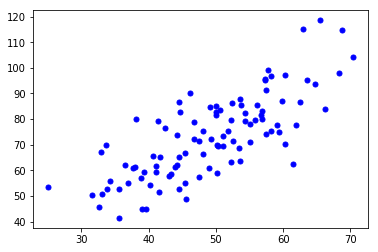

In [14]:
plt.scatter(points[:, 0], points[:, 1], c="b", s=25)

In [0]:
def gradient_step(b_current, m_current, learning_rate, points):
  N = points.shape[0]
  
  b_gradient = 0
  m_gradient = 0
  
  for i in range(0, points.shape[0]):
    x = points[i, 0]
    y = points[i, 1]
    
    y_pred = m_current * x + b_current
    
    b_gradient += -(2/N) *     (y - y_pred)
    m_gradient += -(2/N) * x * (y - y_pred)
    
    #b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
    #m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    
  new_b = b_current - learning_rate*b_gradient
  new_m = m_current - learning_rate*m_gradient
  
  return new_b, new_m

In [0]:
def gradient_descent_runner(points, b_initial, m_initial, learning_rate, num_iterations):
  b = b_initial
  m = m_initial
  
  for i in range(num_iterations):
    b, m = gradient_step(b, m, learning_rate, points)
    loss = least_square_error(b, m, points)
    print("Loss for {0} with b={1}, m={2}".format(loss, b, m))
    
  return b,m

In [0]:
learning_rate = 0.00001
b_initial = 0
m_initial = 0
num_iterations = 1000

In [48]:
b, m = gradient_descent_runner(points, b_initial, m_initial, learning_rate, num_iterations)

Loss for 5073.565488068875 with b=0.0014629895049539548, m=0.07424335285415497
Loss for 4588.511926408893 with b=0.0028530063038672967, m=0.1447650056690438
Loss for 4150.86931788318 with b=0.004173708394003099, m=0.21175152093213528
Loss for 3756.003538182008 with b=0.005428570403448703, m=0.2753801090709894
Loss for 3399.7334196796755 with b=0.00662089278310034, m=0.3358190972561007
Loss for 3078.2864777500095 with b=0.007753810537869222, m=0.39322837470345245
Loss for 2788.2589645577727 with b=0.008830301520207126, m=0.4477598156548126
Loss for 2526.579827342282 with b=0.009853194307891663, m=0.49955768115474686
Loss for 2290.4781895534898 with b=0.010825175686911583, m=0.5487590006872348
Loss for 2077.4540105037636 with b=0.011748797759247776, m=0.5954939346814911
Loss for 1885.2516128552854 with b=0.012626484694353311, m=0.6398861188459882
Loss for 1711.8357976300908 with b=0.013460539142193273, m=0.6820529912415997
Loss for 1555.3702938285676 with b=0.014253148324809835, m=0.7221

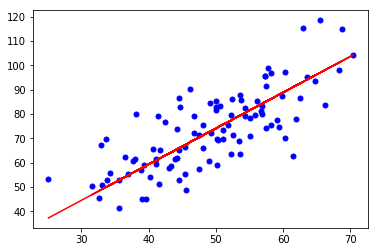

In [50]:
plt.scatter(points[:, 0], points[:, 1], c="b", s=25)
plt.plot(points[:, 0], points[:, 0]*m+b, '-k', color='red')